# <center> Week 6 - Python Programming : Numpy continuation <center>
## <center> Saurav Raj Khanal<center>

So what we did this week in python are;
- (Reminder : Since Tensorflow package could not run in my system the code where tensorflow is used, you would be able to see the output)

### 1. Classification Using Gaussian Naive Bayes
- Loaded and prepared the Iris dataset using `pandas` and `scikit-learn`.
- Split data into training and testing sets.
- Trained and evaluated a Gaussian Naive Bayes model.
- Calculated accuracy and generated a classification report.

### 2. Clustering Algorithms
#### K-Means Clustering:
- Visualized housing data using scatterplots (`matplotlib` and `seaborn`).
- Split and normalized the data.
- Fitted data into a K-Means model and visualized clusters.
- Evaluated clustering using the silhouette score.

### 3. Deep Learning with a Custom Neural Network
- Built a simple neural network with:
  - **1 input layer**
  - **1 hidden layer**
  - **1 output layer**
- Trained the network using synthetic house price data.
- Visualized actual vs. predicted prices using `matplotlib`.

### 4. Deep Learning with TensorFlow
- Trained a neural network on the MNIST dataset:
  - Normalized the data.
  - Built a Sequential model with `Flatten`, `Dense`, and activation layers.
  - Trained and evaluated the model.
  - Made predictions on new data.
- Prepared an image for prediction using a pre-trained model.

### 5. File Operations
- Read and wrote text files using Python's `open()` function:
  - Modes used: `r`, `w`, `a`, etc.
- Read file content line-by-line or as a list.
- Appended new content to existing files.



## Classification 
### Gaussian Naive Bayes Classifier

### Load and prepare dataset



In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from IPython.display import display

#load iris dataset
iris = load_iris()

#create new dataframe from iris data
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: ' virginica'})

display(iris_df.head())
x = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['species']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Split into test and train dataset

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=True)

### Train the GNB classifier


In [3]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)


GaussianNB()

### Make prediction


In [4]:
y_pred = gnb.predict(x_test)
y_pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', ' virginica',
       'versicolor', ' virginica', 'setosa', 'setosa', ' virginica',
       'versicolor', 'setosa', ' virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', ' virginica', 'setosa', ' virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', ' virginica'],
      dtype='<U10')

### Evaluate the model

In [5]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy", accuracy_score(y_test, y_pred))
print("\n Classification Report: \n",)
print(classification_report(y_test, y_pred))

Accuracy 0.9666666666666667

 Classification Report: 

              precision    recall  f1-score   support

   virginica       0.86      1.00      0.92         6
      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Clustering Algorithms

- K-means
- MeanShift
- DBSCAN

### K-Means Clustering Algorithms

- Choose the number of clusters(k)
- Initialize Cluster Centers
- Assign Data Points to Clusters
- Update Centroids
- Repeat

In [6]:
import pandas as pd

home_data = pd.read_csv('data/housing.csv',usecols = ['longitude','latitude','median_house_value'])

home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


### Plot Scattered plot to visualize the data

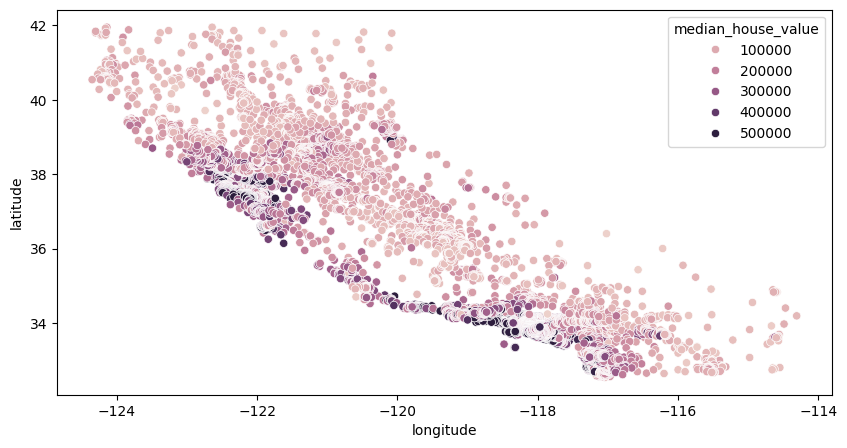

In [7]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(data = home_data, x='longitude', y='latitude', hue='median_house_value')
plt.show()

## Split Train Test and Normalize Data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude','longitude']], 
                                                     home_data[['median_house_value']], test_size=0.33, random_state=0)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

### fit the data into the K-means Model and plot the clusters into Scattered plot

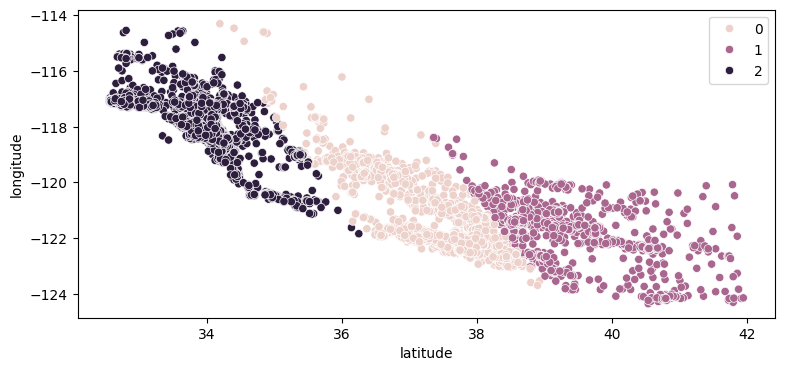

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state =0, n_init='auto')
kmeans.fit(X_train_norm)

plt.figure(figsize=(9,4))
sns.scatterplot(data = X_train, x = 'latitude', y= 'longitude', hue=kmeans.labels_)

plt.show()


### Evaluate Clustering Model using Silhoutee Score (lower score represents a better fit)

In [10]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

np.float64(0.7499371920703546)

## Confusion Matrix

- Accuracy = (TP+TN)/(TP+FP+TN+FN)
- Precision = TP/(TP+FP)
- Recall = TP/(TP+FN)
- where; T is True ,F is False, P is Positive, and N is Negetive 

# Deep Learning
## Design simple artificial neural network
- 1 input
- 1 hidden layer
- 1 output layer

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.01):
        # initialie network parameters
        self.input_neurons = input_neurons
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.learning_rate = learning_rate

        #Random initialization of weights and biases
        np.random.seed(42)
        self.w1 = np.random.randn(input_neurons, hidden_neurons)
        self.b1 = np.random.randn(hidden_neurons)
        self.w2 = np.random.randn(hidden_neurons, output_neurons)
        self.b2 = np.random.randn(output_neurons)
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self,x):
        return x * ( 1 - x )
    
    def forward_pass(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1 # w1.x +b
        self.a1 = self.sigmoid(self.z1) # apply sigmoid activation funvtion f(z) = sigmoid(z)

        self.z2 = np.dot(self.a1, self.w2) + self.b2 
        self.output = self.sigmoid(self.z2) # apply sigmoid activation function

        return self.output
    
    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true)**2)
    
    def backpropagate(self, x, y_true, y_pred):
        error_output = y_pred - y_true
        d_output = error_output * self.sigmoid_derivative(y_pred)
        
        error_hidden = d_output.dot(self.w2.T)
        d_hidden = error_hidden * self.sigmoid_derivative(self.a1)

        self.w2 -= self.a1.T.dot(d_output) * self.learning_rate
        self.b2 -= np.sum(d_output, axis=0) * self.learning_rate
        
        self.w1 -= x.T.dot(d_hidden) * self.learning_rate
        self.b1 -= np.sum(d_output, axis=0) * self.learning_rate

    def train(self, X, y, epochs=5000):
        for epoch in range(epochs):
            y_pred = self.forward_pass(X)

            # Compute loss
            loss = self.compute_loss(y_pred, y)

            # Backpropagation and weights update
            self.backpropagate(X, y, y_pred)

            if epoch % 1000 == 0:
                print(self.w1, self.w2)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
            
    def predict(self, X):
        return self.forward_pass(X)

[[0.49671415]] [[14461.52845797]]
Epoch 0, Loss: 86478089781.0313
[[0.49671415]] [[14461.52845797]]
Epoch 1000, Loss: 86478036078.3620
[[0.49671415]] [[14461.52845797]]
Epoch 2000, Loss: 86478036078.3620
[[0.49671415]] [[14461.52845797]]
Epoch 3000, Loss: 86478036078.3620
[[0.49671415]] [[14461.52845797]]
Epoch 4000, Loss: 86478036078.3620
[[0.49671415]] [[14461.52845797]]
Epoch 5000, Loss: 86478036078.3620
[[0.49671415]] [[14461.52845797]]
Epoch 6000, Loss: 86478036078.3620
[[0.49671415]] [[14461.52845797]]
Epoch 7000, Loss: 86478036078.3620
[[0.49671415]] [[14461.52845797]]
Epoch 8000, Loss: 86478036078.3620
[[0.49671415]] [[14461.52845797]]
Epoch 9000, Loss: 86478036078.3620
[[0.49671415]] [[14461.52845797]]
Epoch 10000, Loss: 86478036078.3620
[[0.49671415]] [[14461.52845797]]
Epoch 11000, Loss: 86478036078.3620
[[0.49671415]] [[14461.52845797]]
Epoch 12000, Loss: 86478036078.3620
[[0.49671415]] [[14461.52845797]]
Epoch 13000, Loss: 86478036078.3620
[[0.49671415]] [[14461.52845797]]

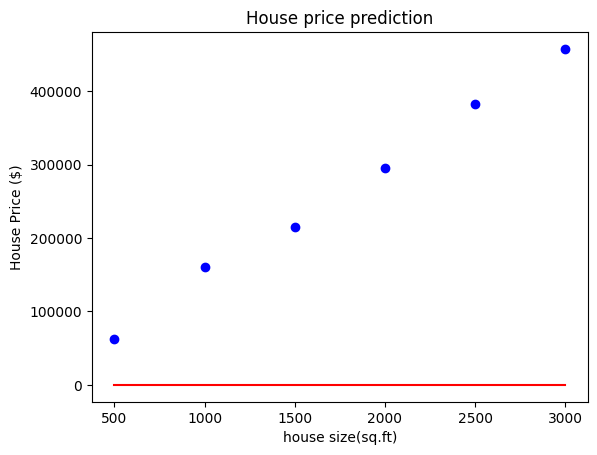

In [12]:
#create some synthetic data for house sizes and corresponding prices
np.random.seed()
X = np.array([[500],[1000],[1500],[2000],[2500],[3000]])
y = X * 150 + (np.random.randn(*X.shape)*10000) # Random noise

nn = NeuralNetwork(input_neurons=1, hidden_neurons=1, output_neurons=1, learning_rate=0.1)
nn.train(X,y, epochs=50000)

predictions = nn.predict(X)

# plotting the data
plt.scatter(X,y, color = 'blue', label='Actual prices') #Actual prices
plt.plot(X, predictions, color='red', label='Predicted prices') # Predicted Prices
plt.xlabel("house size(sq.ft)")
plt.ylabel('House Price ($)')
plt.title('House price prediction')
plt.show()

## Using Tensorflow

In [13]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # This will disable GPU usage.


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data (scale pixel values to range 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Set learning rate
learning_rate = 0.01 
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer, loss ='sparse_categorical_crossentropy', metrics =['accuracy'])

early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights = True
)

# train the model
model.fit(x_train, y_train, epochs =5, batch_size= 32)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

predictions = model.predict(x_test)
print(f"Prediction for first test image: {np.argmax(predictions[0])}")



ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import os

# Load the trained model
model = load_model('trained-data/handwritten-digit-model.keras')

def prepare_image(image_path):
    img = Image.open(image_path).convert('L')
    img =img.resize((28, 28))
    img_array = img_array.reshape(1, 28, 28)
    return img_array

processed_image = prepare_image('data/images/6.png')
prediction = model.predict(processed_image)
predicted_digit = np.argmax(prediction)
print(f'Image: 6, Predicted Digit: {predicted_digit}')

: 

### Open a file from FileSystem
``open(filename, mode, buffering)``

- filename: name of the file we want to open
- mode: Operation mode ( r,w,x,a,b,+)
- buffering: controls buffers

### File operations Table

mode-------Description

- ``r`` : read
- ``w`` : write mode. creates/truncates the file
- ``x`` : Exclusive creation. Fails if the file exists
- ``a`` : append mode. writes data at the end
- ``b`` : binary mode. used with ``rb``, ``wb``.
- ``t`` : text mode(default)
- ``+`` : Update mode (read and write)

### Read a text file and assign the content to a python variable

In [ ]:
with open('data/text.txt','r') as text_file:
    text_content = text_file.read()

print(text_content)

dattebayo !!!



In [ ]:
# read text content line by line using (nextline()) and while loop
with open('data/text.txt','r') as text_file:
    line = text_file.readline() # Read the next line
    while line: # As long as there is a line
        print(line, end='')
        line = text_file.readline() # Read the next line

# using for loop 
with open('data/text.txt','r') as text_file:
    for line in text_file:
        print(line, end='')

# get all llines in a list using readlines()
with open('data/text.txt','r') as text_file:
    lines = text_file.readlines()
    print(lines)

dattebayo !!!
kaizoku wa orewa naru
dattebayo !!!
kaizoku wa orewa naru
['dattebayo !!!\n', 'kaizoku wa orewa naru\n']


### Writing to Files: Open file for writing using open('file','w')

- ``write(content)`` write at once
- ``writelines([line1,line2])
- Append to files: Open file with ``open(file,'a')``

In [ ]:
# Write whole content at once
with open('data/n1.txt','w') as new_file:
    new_file.write('Replace Content!')

# Write line by line
with open('data/n2.txt','w') as new_file:
    new_file.writelines(['Hello \n World \n'])

#
with open('data/n3.txt','w') as file:
    file.write('This should append on file-1.txt\n')


### Python Handling Directories

the os module provides the various functions for working with directories

- Create new directory:
    - os.mkdir(dirname) : create single directory
    - os.makedirs(parent-dir/child-dir) : create dir-1 and inside it create dir2

- Check if a Directory Exists
    - os.path.exists(path) : returns True if the path exists (both for file or directory)
    - os.path/isdir(path) : returns True if the path is a directory

- List files and subdirectories in a directory
    - os.listdir(dirname) : Returns list of all directory and files inside the given directory

- Remove a directory
    - os.rmdir(path) : Removes an empty directory
    - os.removedirs(path) : Remove intermediate empty directories

- Rename a directory
    - os.rename(src,dst) : Renames or moves the directoey
    - os.stat(path) : Returns the status of a file or directory (permissions, size , etc)

Directory does not exists 

CHECKING IF A DIRECTORY EXISTS ::::> 

It's a directory.
subhome-ai.jpg


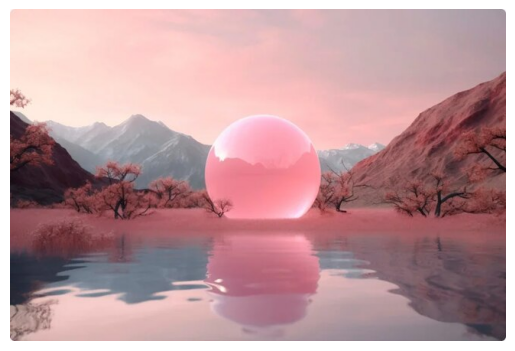

In [ ]:
import os
# os.mkdir('data/A_File')
# os.makedirs('data/A_File/B_File')
# os.path.exists('data/A_File')
# os.path.isdir('data/A_File')

# Creating nested directories
# os.makedirs('p-dir/ch-dir')

# os.mkdir('data/test_dir')

# Checks if directory exists
if os.path.exists('data/test-dir'):
    print("Directory Exists.\n")
else:
    print('Directory does not exists \n')
    # os.makedirs('data/test-dir')
    # print("new directory created......")

# Checking if a directory exists
print("CHECKING IF A DIRECTORY EXISTS ::::> \n")
if os.path.isdir('data/test_dir'):
    print("It's a directory.")
else:
    print("It's not a directory")


# List contents of the directory
contents = os.listdir('data/test_dir')
for content in contents:
    
    print(content)

# printing image if the directory has one
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the directory you want to check
dir_path = "data/test_dir"

# Check if the directory contains any image files (e.g., .jpg, .png)
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')

# List all files in the directory
image_files = [f for f in os.listdir(dir_path) if f.lower().endswith(image_extensions)]

# If there are any image files, display the first one
if image_files:
    image_path = os.path.join(dir_path, image_files[0])
    img = mpimg.imread(image_path)  # Load the image
    plt.imshow(img)  # Display the image
    plt.axis('off')  # Turn off axis
    plt.show()  # Show the image
else:
    print("No image files found in the directory.")

# Another way
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# img_dir = 'data'
# for file in os.listdir(img_dir):
#     if not os.path.isdir(f"{img_dir}/{file}") and '.png' in file:
#         img = mpimg.imread(f"{img_dir}/{file}")
#         plt.imshow(img)
#         plt.show


## Homework

## Predicting Breast Cancer Diagnosis 

### Data Loading

In [1]:
import pandas as pd
import numpy as np

columns = [
    'ID', 'Diagnosis',
    'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness',
    'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimension',
    'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE',
    'Compactness SE', 'Concavity SE', 'Concave Points SE', 'Symmetry SE', 'Fractal Dimension SE',
    'Worst Radius', 'Worst Texture', 'Worst Perimeter', 'Worst Area', 'Worst Smoothness',
    'Worst Compactness', 'Worst Concavity', 'Worst Concave Points', 'Worst Symmetry', 'Worst Fractal Dimension'
]

wdbc_data = pd.read_csv('data/wdbc.data', header=None, names=columns)
wdbc_data.head()


,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Preprossing

In [2]:
from sklearn.preprocessing import StandardScaler

# Dropping the ID column as it doesn't contribute to the model
wdbc_data = wdbc_data.drop(columns=['ID'])

# Encoding the diagnosis column into categorical values (keeping 'B' and 'M')
# wdbc_data['Diagnosis'] = wdbc_data['Diagnosis'].map({'B': 'Benign', 'M': 'Malignant'})

# Splitting features (X) and target (y)
X = wdbc_data.iloc[:, 1:]  # all columns except Diagnosis
y = wdbc_data['Diagnosis']  # target column

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Test Train Split

In [3]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Handling missing values in y_train (if any)
y_train.fillna(y_train.mode()[0], inplace=True)  # Replace NaNs with the most frequent value


### Train the GNB classifier

In [4]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

### Make Prediction

In [5]:
y_pred = gnb.predict(X_test)
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M'], dtype='<U1')

### Evaluate the Model

In [6]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\n Classification Report: \n",)
print("classification_report: ", classification_report(y_test, y_pred))

Accuracy:  0.9649122807017544

 Classification Report: 

classification_report:                precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

